# DPEE 1072
## Inductor Design
### Boost in CCM
#### Prof. Humberto Pinheiro,Ph.D.

In [1]:
import numpy as np
from numpy import pi
from scipy import sqrt, exp, cos, matrix, vstack, hstack, zeros
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
import mpld3
import math as m
import cmath
import sympy as sp
sp.init_printing()

![Boost in CCM](img/boost_000.png)

## Input Data

In [2]:
Prated=200
E1=200
E2=400  
fsw=100000
 

T=1/fsw
print ( ' fsw=', fsw/1000,'kHz')
print ( ' T=', T*10**6,'us')

 fsw= 100.0 kHz
 T= 10.0 us


Text(0.5,1,'MOSFET gate source voltage')

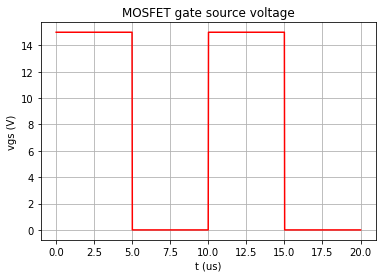

In [3]:
d=0.5
t1=np.linspace(0,2*T,1000)
ts1=t1<d*T
ts2=(t1>=d*T)*(t1<T)
ts3=(t1>T)*(t1<(d*T+T))
ts4=(t1>T)*(t1>(d*T+T))
vag=1*ts1+0*ts2+1*ts3+0*ts4
mpld3.enable_notebook()
plt.grid()
plt.plot(t1*10**6,15*vag,'r')
plt.xlabel('t (us)')
plt.ylabel('vgs (V)' )
plt.title('MOSFET gate source voltage')

In CCM the boost conveter has two stages of operation that are described bellow. 

## Stage 1            
The first stage lasts for $0 \le t \le dT$. The voltage $v_{gs}=15V$, the MOSFET conducts, and  the equivalent circuit is, :
![Buck in CCM. Equivalente circuit for the stage 1](img/boost_stage1.png)


In this stage $ v_{gs}=15V$ and the MOSFET is on.
From the KVL one has:

${v_L} = L\frac{{di_L}}{{dt}} = {E_1}$           

without losing generatily let us assume that 

${i_L}(0) = {I_m} \ge 0$ 

By soving the diferential equation results:


${i_L}(t) = I_m + \frac{E_1}{L}t{\rm{ }}$

for any $0 \le t \le dT$.

At the end of this stage when $t=dT$ the inductor current is at its peak, that is:

${i_L}(dT) = {I_m} + \frac{{{E_1}}}{L}dT{\rm{ }}$

Let us name the peak value of the inductor current $I_M$, therefore

${i_L}(dT)={I_M} = {I_m} + \frac{{{E_1}}}{L}dT{\rm{ }}$

or 

${I_M} - {I_m} = \Delta I = {\rm{ }}\frac{{{E_1}}}{L}dT{\rm{  }}$


In addtion the voltage across the diode is:

$v_{ak}=-E_2$





## Stage 2            
This stage last for $dT \le t \le T$ and the equivalent circuit is:
![Stage 2 - Equivalent circuit for the Boost converter operating in CCM](img/boost_stage2.png)


Once again, from the KVL one has:

${v_L} = L\frac{{di_L}}{{dt}} = {E_1- E_2}$   

with 
${i_L}(dT) = {I_M} \ge 0$ 

By soving the diferential equation results:

${i_L}(t) = {I_M} + \frac{{ E_1- {E_2}}}{L}(t-dT){\rm{ }}$

for any $dT \le t \le T$.



For operation in steady state in CCM the following equality must be satisfied

${i_L}(T)=I_m$


therefore,

${i_L}(T)={I_m} = {I_M} + \frac{{E_1 - {E_2}}}{L}(1-d)T{\rm{ }}$

or

$\Delta I = {\rm{ }}\frac{{{E_2-E_1}}}{L}(1 - d)T{\rm{  }}$


Now by equating the equation of the $\Delta I$ obtained in satge 1 and 2 we have

${\rm{ }}\frac{{{E_1}}}{L}dT{\rm{  }}=\Delta I = {\rm{ }}\frac{{{E_2-E_1}}}{L}(1 - d)T{\rm{  }}$

By simplifing the above equation results in the relation between the input and output voltage of the boost converter operating in CCM, or the voltage gain:

$$\frac{1}{1-d} = \frac{{{E_2}}}{{{E_1}}}$$

This means that for operation in steady state in CCM the above equation must be satisfied!

Therefore for CCM 

$\Delta I = {\rm{ }}\frac{{({E_2-E_1})E_1T}}{E_2L}{\rm{  }}$

Finally the voltage across the MOSFET is:

$v_{DS}=E_2$

Text(0.5,1,'Boost in CCM gain')

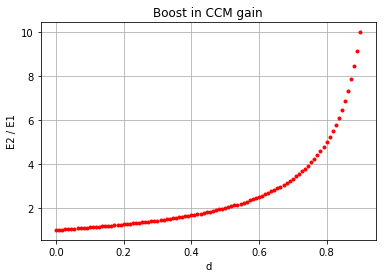

In [4]:
d = np.linspace(0, 0.9, 100)
gain=1/(1-d)
mpld3.enable_notebook()
plt.grid()
plt.plot(d,gain,'r.')
plt.xlabel('d')
plt.ylabel('E2 / E1')
plt.title('Boost in CCM gain')

## Desiging 

Let us start by defining the current through the inductor

${i_L}(t) = \left\{ {\begin{array}{*{20}{c}}
{{I_m} + \frac{{{E_1}}}{L}t}&\forall &{0 < t \le dT}\\
{{I_M} + \frac{{  E_1-{E_2}}}{L}(t - dT)}&\forall &{dT < t \le T}
\end{array}} \right.$

Therefore the average current at the output is:

${I_{L\_av}} = \frac{1}{T}\int_0^T {{i_L}(t)dt}$

${I_{L\_av}} = {I_m} + \frac{{{E_1}({E_2} - {E_1})T}}{{2L{E_2}}} = {I_M} - \frac{{{E_1}({E_2} - {E_1})T}}{{2L{E_2}}}$

which leads to

${I_{L\_av}} = \frac{{{I_m} + {I_M}}}{2}$

Note that

${I_{L\_av}} = {I_m} + \frac{{\Delta I}}{2}$.

or

${I_m} = {I_{L\_av}} - \frac{{\Delta I}}{2}$,

therefore, to ensure operation in CCM, the inductor current must be greater than zero or ${I_m} > 0$,
and as a result

${I_{L\_av}} > \frac{{\Delta I}}{2}$.

The smallest inductor average current for operation in CCM can be expressed as a function of the output power

${I_{L\_av\_\min }} = \frac{{{P_{\min }}}}{{{E_1}}}$

It is possible to conclude that the inductor required to ensure operation in CCM for output power greater than $P_{min}$ is found from

$\frac{{2{P_{\min }}}}{{{E_1}}} \ge \Delta I$

that is

$L \ge \frac{{{E_1}^2({E_2} - {E_1})T}}{{2{E_2}{P_{\min }}}}$




## Example

In [5]:
Pmin=0.4*Prated
L=E1**2*(E2-E1)*T/(2*E2*Pmin)
print( 'L=',L*10**6,'uH')
d=1-E1/E2
print('d=',d)
Delta_I=E1/L*d*T
print( 'Delta I =',Delta_I,'A' )
Iav=Prated/E1
print( 'Average input current  Iav=',Iav,'A' )
Im=Iav-Delta_I/2
print( 'Im=',Im,'A' )
IM=Iav+Delta_I/2
print( 'IM=',IM,'A' )


L= 1250.0 uH
d= 0.5
Delta I = 0.8 A
Average input current  Iav= 1.0 A
Im= 0.6 A
IM= 1.4 A


###### RMS Current on the MOSFET

${i_{MOSFET}}(t) = \left\{ {\begin{array}{*{20}{c}}
{{I_m} + \frac{{{E_1}}}{L}t}&\forall &{0 < t \le dT}\\
0&\forall &{dT < t \le T}
\end{array}} \right.$


The MOSFET rms current is:

$${I_{MOSFET\_rms}} = \sqrt {\frac{1}{T}\int_0^T {{i_{MOSFET}}{{(t)}^2}dt} }  $$

In [6]:
Im=Iav-Delta_I/2
t=sp.symbols('t')
Irms=sp.sqrt(1/T*sp.integrate( (Im+E1*t/L)**2,(t,0,d*T)))
print('Irms_MOSFET=',Irms,'A')

Irms_MOSFET= 0.725718035235908 A


Average and RMS current on the diode

$${i_{DIODE}}(t) = \left\{ {\begin{array}{*{20}{c}}
0&\forall &{0 < t \le dT}\\
{{I_M} + \frac{{ {E_1-E_2}}}{L}(t - dT)}&\forall &{dT < t \le T}
\end{array}} \right.\frac{{\frac{{}}{{}}}}{{}}$$


$$\begin{array}{l}
{I_{DIODE\_rms}} = \sqrt {\frac{1}{T}\int_0^T {{i_{DIODE}}{{(t)}^2}dt} } \\
\\
{I_{DIODE\_av}} = \frac{1}{T}\int_0^T {{i_{DIODE}}(t)dt} 
\end{array}$$


In [7]:
IM=Iav+Delta_I/2
t=sp.symbols('t')
Irms_diode=sp.sqrt( 1/T*sp.integrate( (IM+(E1-E2)/L*(t-d*T))**2,(t,d*T,T) ) )
print('Irms_diode=',Irms_diode,'A')
Iav_diode=1/T*sp.integrate( (IM+(E1-E2)*(t-d*T)/L),(t,d*T,T))
print('Iav_diode=',Iav_diode,'A')

Irms_diode= 0.725718035235908 A
Iav_diode= 0.500000000000000 A


Simulation results validates the theoritical analysis

![Inductor current - Boost converter operating in CCM](img/BOOST_CCM_Inductor_current.png)

##  Inductor design

${i_L} = \left\{ {\begin{array}{*{20}{c}}
{{I_m} + \frac{{{E_1} }}{L}t}&\forall &{0 < t \le dT}\\
{{I_M} + \frac{{ E_1- {E_2}}}{L}(t - dT)}&\forall &{dT < t \le T}
\end{array}} \right.$

Therefore the peak value of the inductor current is:

In [8]:
print ( ' Inductor peak current =',IM,'A')

 Inductor peak current = 1.4 A


The RMS value of the inductor current is:

In [9]:
Irms_inductor=sp.sqrt(1/T*(sp.integrate((IM+(E1-E2)*(t-d*T)/L)**2,(t,d*T,T))+sp.integrate((Im+(E1)*t/L)**2,(t,0,d*T))))
print('RMS value of the inductor current =',Irms_inductor,'A')
print( 'Delta I =',Delta_I,'A', ' @ fsw=',fsw/1000,'kHz')

RMS value of the inductor current = 1.02632028788938 A
Delta I = 0.8 A  @ fsw= 100.0 kHz


![Boost in CCM](img/bh_curve_boost_ccm1.png)


Here the inductor will be design using the $A_eA_w$ method.

$${A_e}{A_w} = \frac{{L{I_{L\_peak}}{I_{L\_rms}}}}{{{B_{\max }}{J_{\max }}{k_w}}}({m^4})$$

where

$\begin{array}{l}
I_{L\_peak}, I_{L\_rms} & (A)\\
B_{\max} &  (T)\\
J_{\max} & (A/{m^2})
\end{array}$


Typical values for the current density , $J$, are between $200$ to $400A/c{m^2}$ for switching mode power supply magnetics. On the other hand, the maximum flux density depends on the core material and its losses. Let us consider a ferrite core designed for the maximum flux density of $B_{max}$ expressed in $T$ ( Tesla). 
For the ferrite material parameters visit
https://www.mag-inc.com/getattachment/Products/Ferrite-Cores/Ferrite-Shapes/FerriteCoresMaterialsSummary-(2).pdf?lang=en-US


In [10]:
Bmax=0.1
Jmax=300*10**4
kw=0.6
AeAw=L*IM*Irms_inductor/(Bmax*Jmax*kw)
print( "AeAw=",AeAw*10**8,'cm^4')

AeAw= 0.997811391003561 cm^4


Note that $k_w$ is the window occupation factor that is positive and smaller than one. 

The Ferrite Core can be selected from the manufacture data sheets, for instance:

https://www.mag-inc.com/

https://www.magmattec.com.br/nucleo-de-ferrite

https://product.tdk.com/info/en/products/ferrite/ferrite/ferrite-core/catalog.html



Let us start by selecting a Ferrite E core with $A_eA_w$ close to the previously computed, that is: 



![Inductor current - Boost converter operating in CCM](img/Core_1.png)

In [11]:
M=0.8
D=0.98
F=0.93
C=0.93
Aw=M*2*D
Ae=F*C
print ( 'Ae=', Ae,'cm^2')
print ( 'AeAw=',Ae*Aw,'cm^4')

Ae= 0.8649000000000001 cm^2
AeAw= 1.3561632000000001 cm^4


Now let us select the number of turns to obtain the predefined peak value of the flux density, that is:

$\begin{array}{l}
Li = N\phi \\
L{I_{peak}} = N{\phi _{\max }}\\
\\
{\phi _{\max }} = {B_{\max }}{A_e}\\
\\
L{I_{peak}} = N{B_{\max }}{A_e}\\
\\
N = \frac{{L{I_{peak}}}}{{{B_{\max }}{A_e}}}
\end{array}$

In [12]:
N=L*IM/(Bmax*Ae*10**(-4))
print ( 'Number of Turns N=',np.int(N))

Number of Turns N= 202


Usually, inductors use air gap to avoid the inductance dependence on the  core permeability. Thus, considering that the air gap reluctance is predominant in the inductor, the inductance can be expressed as:

$L = \frac{{{N^2}}}{{{\Re _g}}} = \frac{{{N^2}{\mu _0}{A_e}}}{{{l_g}}}$

or

${l_g} = \frac{{{N^2}{\mu _0}{A_e}}}{L}$

where

${\mu _0} = 4\pi {10^{ - 7}}H/m$


To recall where the above equation came from remember that in the gap:

${\mathbf{B}} = {\mu _0}{\mathbf{H}}$

with an uniform field flux distribuition

$B = {\mu _0}H$ 

and

$\frac{\phi }{{{A_e}}} = {\mu _0}\frac{{NI}}{{{l_g}}}$.

In a linear incutor 

$LI = N\phi $.

Therefore

$LI = {\mu _0}\frac{{{N^2}I}}{{{l_g}}}{A_e}$

which results

$L = {\mu _0}\frac{{{N^2}}}{{{l_g}}}{A_e} = \frac{{{N^2}}}{\Re }$



In [13]:
mu0=4*np.pi*10**-7
lg=np.int(N)**2*mu0*(Ae*10**(-4))/L
print('L=',L*10**6 )
print ( 'N=', np.int(N))
print('Total Air gap length lg=',lg*1000,'mm')

L= 1250.0
N= 202
Total Air gap length lg= 3.547876444365079 mm



![gap EE](img/gap.png)

            (a) 3 leg gapped ferrite                     (b)Center leg gapped ferrite

Now, let us select the conductor cross section. Note that the current desinty is:

$J = \frac{{{I_{L\_rms}}}}{{{A_{cu}}}}$

therefore,

${A_{cu}} = \frac{{{I_{L\_rms}}}}{J}$


In [14]:
Acu=Irms_inductor/Jmax
print ('Jmax=',Jmax*10**(-4),'cm^2')
print ( 'Conductor total cross section, Acu=',Acu*10**6,'mm^2')

Jmax= 300.0 cm^2
Conductor total cross section, Acu= 0.342106762629792 mm^2


## Copper Losses
The length of the turn is estimated here as:


In [15]:
lcu=(F+M)*2+(1.2*C)*2
lcuT=lcu*N/100
print ( ' Length of a turn lcu=',lcu,'cm')
print ( ' Total Length of the winding lcuT=',lcuT,'m')


 Length of a turn lcu= 5.692 cm
 Total Length of the winding lcuT= 11.51693837437854 m


 The dc resistance of the winding is 
 
${R_{dc}} = \frac{{\rho {l_{cuT}}}}{{{A_{cu}}}}$

where the resistivity of the copper is
 
$\rho  = 1.68 \times {10^{ - 8}}(1 + 0.00404(T - {20})){\rm{  }}\Omega {\rm{/m}}$

and $T$ is the winding temperature in $^oC$.

In [16]:
Rho=1.68*10**(-8)*(1+0.00404*(100-20))
Rdc=Rho*lcuT/Acu
print( ' DC resisitance of the winding Rdc=',Rdc,'ohm')

 DC resisitance of the winding Rdc= 0.748359295879437 ohm


The high frequency current components can be thought as circulating in an annular cylindrical equivalent conductor with width $\delta$, which is known as skin depth. The equivalent ac resistance at a given frequency can be expressed as [3]:

${R_{ac}} = {k_s}{R_{dc}}$

where

${k_s} = \left\{ {\begin{array}{*{20}{c}}
{1 + \frac{{{{\left( {\frac{r}{\delta }} \right)}^4}}}{{48 + 0.8{{\left( {\frac{r}{\delta }} \right)}^4}}}}&{{\rm{for}}}&{\frac{r}{\delta } < 1.7}\\
{0.25 + 0.5\frac{r}{\delta } + \frac{3}{{32}}{{\left( {\frac{r}{\delta }} \right)}^{ - 1}}}&{{\rm{for}}}&{\frac{r}{\delta } > 1.7}
\end{array}} \right.$

and

$\delta  = \sqrt {\frac{\rho }{{\pi f{\mu _0}}}} $.

In the above equation:

$r$ is the  radius  of the conductor

$\rho$ is the resistivity of the considered conductor

$\mu _0$ is the permeability of the air ( actually it should be the permeability of the cooper)

$f$  is the considered frequency component

Alternatively, the AC resistance can be expressed as [4]:

${R_{ac}} \approx \frac{{{l_{cuT}}\rho }}{{\pi (D - \delta )\delta }}$


In [17]:
fsw=100000
Skin_depth=np.sqrt(Rho/(np.pi*fsw*mu0))
print ('fsw=',fsw/1000,'kHz')
print ('Skin_depth=',Skin_depth*1000,'mm')
r1=sp.sqrt(Acu/np.pi)
print ('Radius of the conductor, r=',r1*1000,'mm')
print ('Ratio r/Skin_depth =',r1/Skin_depth)
ks=1+( (r1/Skin_depth)**4 )/( 48 + 0.8*(r1/Skin_depth)**4 )
##ks=0.25+0.5*(r1/Skin_depth)+3/32*(r1/Skin_depth)**(-1)
print('ks=',ks)
Rac=ks*Rdc
print('DC resistance     , Rdc=',Rdc,'ohm')
print('AC resistance @fsw, Rac=',Rac,'ohm')
print('AC resistance @fsw, Rac=',Rho*lcuT/(np.pi*(2*sp.sqrt(Acu/np.pi)-Skin_depth)*Skin_depth), 'ohm' )
print('Rac/Rdc=',Rac/Rdc)

fsw= 100.0 kHz
Skin_depth= 0.23729441603655016 mm
Radius of the conductor, r= 0.329993885815168 mm
Ratio r/Skin_depth = 1.39065171160344
ks= 1.07334513988922
DC resistance     , Rdc= 0.748359295879437 ohm
AC resistance @fsw, Rac= 0.803247813123113 ohm
AC resistance @fsw, Rac= 0.812473125407377 ohm
Rac/Rdc= 1.07334513988922


${P_{cu}} = {R_{dc}}I_{L\_av}^2 + \frac{{{R_{dc}}}}{2}\sum\limits_h^\infty  {{k_{s\_h}}I_h^2}$

Here just the amplitude, peak value, of the inductor current component at $f_{sw}$ will be considered and it can be approximate as:

In [18]:
Iac_fsw=Delta_I/2

In [19]:
Pcu=Rdc*Iav**2+Rdc/2*ks*(Iac_fsw)**2
print( 'Copper losses AC Pcu=',(Rdc/2*ks*(Iac_fsw)**2)*10**3,'mW')
print( 'Copper losses Pcu=',Pcu*10**3,'mW')

Copper losses AC Pcu= 64.2598250498491 mW
Copper losses Pcu= 812.619120929286 mW


Note that proximity effect losses can increase the estimanted copper losses [3].

## Core Losses

The core losses can be estimated from the core volume, flux density ac component at the switching frequency,$\Delta B$, that is:

$\frac{{\Delta B}}{{{B_{\max }}}} = \frac{{\Delta H}}{{{H_{\max }}}}=\frac{{\Delta I}}{{{I_{\max }}}}$

or

$\Delta B = \frac{{\Delta I}}{{{I_{\max }}}}{B_{\max }}$


In [56]:
DeltaB=Delta_I/IM*Bmax
print ( ' Delta B=',DeltaB*1000,'mT')

 Delta B= 142.8571428571429 mT




![Ferrite Core Losses Magnetics R material](img/corelosses.png)

Source:https://www.mag-inc.com/Design/Technical-Documents/Ferrite-Core-Documents

In [55]:
Pcore_volume=15
print ( 'Core losses per volume ',Pcore_volume,'mW/cm^3')
Ve=5590*10**(-3)
print ( 'Core Volume, Ve=',Ve,'cm^3')
Pcore=15*Ve/1000
print( 'Estimated Core Losses, Pcore=',Pcore*10**3,'mW')

Core losses per volume  15 mW/cm^3
Core Volume, Ve= 5.59 cm^3
Estimated Core Losses, Pcore= 83.85 mW


## Total Inductor Losses

In [22]:
PL_total=Pcore+Pcu
print ( 'Total inductor losses Pl_total=',PL_total*1000,'mW')

Total inductor losses Pl_total= 896.469120929286 mW


## Second interaction of the inductor design
Let us increase the maximum value of the flux density, $B_{max}$, and reduce the current density, $J_{max}$, aiming to reduce the copper losses and increase the core losses.

In [23]:
Bmax=0.25
Jmax=180*10**4
kw=0.6
AeAw=L*IM*Irms_inductor/(Bmax*Jmax*kw)
print( "AeAw=",AeAw*10**8,'cm^4')

AeAw= 0.665207594002374 cm^4



![Inductor current - Boost converter operating in CCM](img/FerriteCore2.png)

In [24]:
M=0.64
D=1.26
F=0.635
C=0.635
Aw=M*2*D
Ae=F*C
print ( 'Ae=', Ae,'cm^2')
print ( 'AeAw=',Ae*Aw,'cm^4')

Ae= 0.403225 cm^2
AeAw= 0.65032128 cm^4


In [25]:
N=L*IM/(Bmax*Ae*10**(-4))
print ( 'Number of Turns N=',np.int(N))

Number of Turns N= 173


In [26]:
mu0=4*np.pi*10**-7
lg=np.int(N)**2*mu0*(Ae*10**(-4))/L
print('L=',L*10**6 )
print ( 'N=', np.int(N))
print('Total Air gap length lg=',lg*1000,'mm')

L= 1250.0
N= 173
Total Air gap length lg= 1.2132198513527208 mm


In [27]:
Acu=Irms_inductor/Jmax
print (Jmax)
print ( 'Conductor total cross section, Acu=',Acu*10**6,'mm^2')

1800000
Conductor total cross section, Acu= 0.570177937716321 mm^2


In [28]:
lcu=(F+M)*2+(1.2*C)*2
lcuT=lcu*N*10**(-2)
print ( ' Length of a turn lcu=',lcu,'cm')
print ( ' Total Length of the winding lcuT=',lcuT,'m')

 Length of a turn lcu= 4.074 cm
 Total Length of the winding lcuT= 7.072478144956289 m


In [29]:
Ro=1.68*10**(-8)*(1+0.00404*(100-20))
Rdc=Ro*lcuT/Acu
print( ' DC resisitance of the winding Rdc=',Rdc,'ohms')

 DC resisitance of the winding Rdc= 0.275737592368656 ohms


In [30]:
fsw=100000
Skin_depth=np.sqrt(Ro/(np.pi*fsw*mu0))
print ('fsw=',fsw/1000,'kHz')
print ('Skin_depth=',Skin_depth*1000,'mm')
r1=sp.sqrt(Acu/np.pi)
print ('Radius of the conductor, r=',r1*1000,'mm')
print ('Ratio r/Skin_depth =',r1/Skin_depth)
ks=1+( (r1/Skin_depth)**4 )/( 48 + 0.8*(r1/Skin_depth)**4 )
##ks=0.25+0.5*(r1/Skin_depth)+3/32*(r1/Skin_depth)**(-1)
print('ks=',ks)
Rac=ks*Rdc
print('DC resistance     , Rdc=',Rdc,'ohm')
print('AC resistance @fsw, Rac=',Rac,'ohm')

Iac_fsw=Delta_I/2
Pcu=Rdc*Iav**2+Rdc/2*ks*(Iac_fsw)**2
print( 'Copper losses Pcu=',Pcu*10**3,'mW')



fsw= 100.0 kHz
Skin_depth= 0.23729441603655016 mm
Radius of the conductor, r= 0.426020274704139 mm
Ratio r/Skin_depth = 1.79532363980499
ks= 1.18449161015589
DC resistance     , Rdc= 0.275737592368656 ohm
AC resistance @fsw, Rac= 0.326608864765259 ohm
Copper losses Pcu= 301.866301549876 mW


In [31]:
DeltaB=Delta_I/IM*Bmax
print ( ' Delta B=',DeltaB*1000,'mT')

 Delta B= 142.8571428571429 mT


In [32]:
Pcore_volume=150
print ( 'Core losses per volume ',Pcore_volume,'mW/cm^3')
Ve=2950*10**(-3)
print ( 'Core Volume, Ve=',Ve,'cm^3')
Pcore=Pcore_volume*Ve/1000
print( 'Estimanted Core Losses, Pcore=',Pcore*10**3,'mW')

Core losses per volume  150 mW/cm^3
Core Volume, Ve= 2.95 cm^3
Estimanted Core Losses, Pcore= 442.5 mW


In [33]:
PL_total=Pcore+Pcu
print ( 'Total inductor losses Pl_total=',PL_total*1000,'mW')

Total inductor losses Pl_total= 744.366301549876 mW




To converter ${mm^2}$ to American wire gauge (AWG) one may access https://www.rapidtables.com/calc/wire/awg-to-mm.html

## Output Capacitor Design

### Frequency domain approach

![ Boost converter operating in CCM](img/boost_ccm_voltage_ripple.png)
#### For a given frequency componant of current through the capacitor the corresponding voltage is found as
$${V_{ac}} =  - j{X_c}{I_{ac}}$$
#### and their magnitude can be expressed as
$$\left| {{V_{ac}}} \right| = {X_c}\left| {{I_{ac}}} \right|$$
#### where
$${X_c} = \frac{1}{{2\pi fC}}$$
#### and $f$ is the frenquency of the consired frequency component




Example 1

In [34]:
C=10*10**-6
print( 'C=',C*10**6, 'uF')

C= 10.0 uF


then

In [35]:
Xc=1/(2*pi*fsw*C)
print ( 'Xc=',Xc, 'ohms')

Xc= 0.15915494309189537 ohms


From the simulation it is possible to find the amplitude of the current component @fsw through the capacitor


![Boost output capacitor current](img/boost_ccm_capacitor_current.png)


![Boost output capacitor current spectrum](img/boost_ccm_capacitor_current_FFT.png)

In [36]:
Iac=0.6569
print( 'Iac=',Iac,'A @',fsw/1000,'kHz')

Iac= 0.6569 A @ 100.0 kHz


Then the peak to peak ac component of the capacitor voltage is: 

In [37]:
Vca_p2p=Xc*Iac*2
print ( 'Vca_p2p=',Vca_p2p,'V @',fsw/1000,'kHz')

Vca_p2p= 0.20909776423413215 V @ 100.0 kHz


The voltage ripple as a percetage of the output dc component is

In [38]:
Ripple=Vca_p2p/E2*100
print ( 'The peak to peak voltage ripple =', Ripple,'%')

The peak to peak voltage ripple = 0.05227444105853304 %


Example 2

Let us consider in the above example that the maximum allowed ripple is 

In [39]:
Ripple=1
print ( 'Maximum allowed output capacitor voltage ripple =',Ripple,'%')

Maximum allowed output capacitor voltage ripple = 1 %


In [40]:
Vca_p2p=Ripple/100*E2
print ( 'Maximum allowed output capacitor voltage ripple =',Vca_p2p,'V peak to peak')

Maximum allowed output capacitor voltage ripple = 4.0 V peak to peak


From the simulation, file buck_ccm_1.psimsch, it is possible to find that capacitor current component at $f_{sw}$ using the FFT function, that is:


In [41]:
Iac=0.6569

Therefore

In [42]:
Xc=Vca_p2p/(2*Iac)
print ( 'Xc=',Xc, 'ohms')

Xc= 3.0446034404018874 ohms


In [43]:
C=1/(2*pi*fsw*Xc)
print ( ' C=', C*10**6, 'uF')

 C= 0.5227444105853303 uF


boost_ccm_capacitor_votage_ripple

![Boost output capacitor voltage ripple](img/boost_ccm_capacitor_votage_ripple.png)

## Output capacitor current component by means of Fourier Series

For a buck opeating in CCM the current through the output capacitor can be found by subtracting the inductor current from its average value, that is:

$${i_{ac}}(t) = \left\{ {\begin{array}{*{20}{c}}
{ - {I_{av2}}}&\forall &{0 < t \le dT}\\
{{I_M} + \frac{{{E_1} - {E_2}}}{L}(t - dT) - {I_{av2}}}&\forall &{dT < t \le T}
\end{array}} \right.$$




where, as mentioned above

$$d = 1-\frac{{{E_1}}}{{{E_2}}}$$


$$I_M=I_{av1}+\frac{\Delta I}{2}$$

$$I_{av1}=\frac{P_{rated}}{E_1}$$

In [44]:
d=1-E1/E2
Delta_I=E1/L*d*T
Iav1=Prated/E1
Iav2=Prated/E2
IM=Iav1+Delta_I/2
print('Delta_I=',Delta_I,'A')
t=sp.symbols('t')
ia_s1=-Iav2
ia_s2=IM+(E1-E2)/L*(t-d*T)-Iav2
ia_s2

Delta_I= 0.8 A


Text(0.5,1,'Output Capacitor Current')

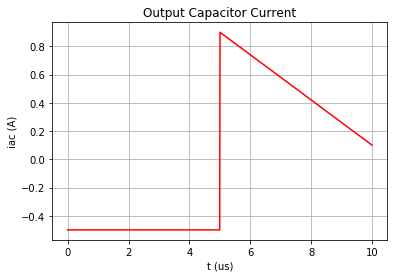

In [45]:
t1=np.linspace(0,T,1000)
ts1=t1<d*T
ts2=t1>=d*T
iac=-Iav2*ts1+(IM+(E1-E2)/L*(t1-d*T)-Iav2)*ts2
mpld3.enable_notebook()
plt.grid()
plt.plot(t1*10**6,iac,'r')
plt.xlabel('t (us)')
plt.ylabel('iac (A)' )
plt.title('Output Capacitor Current')

Since $i_{ac}$ is periodic with period $T$, its harmonic components can be obtained from the Fourier Series

The magnitude of the hamonic component at $f_{sw}$ is:
$${I_{ac}} = \sqrt {{{({I_{ac\_\cos }})}^2} + {{({I_{ac\_\sin }})}^2}} $$

where
$$\begin{array}{l}
{I_{ac\_\cos }} = \frac{2}{T}\int_0^T {{i_{ac}}} (t)\cos (\frac{{2\pi }}{T}t)dt\\
{I_{ac\_\sin }} = \frac{2}{T}\int_0^T {{i_{ac}}} (t)\sin (\frac{{2\pi }}{T}t)dt
\end{array}$$

In [46]:
Iac_cos1=2/T*( sp.integrate(ia_s1*sp.cos(2*pi/T*t),(t,0,d*T) ) )
Iac_cos2=2/T*( sp.integrate(ia_s2*sp.cos(2*pi/T*t),(t,d*T,T)) )
Iac_cos=Iac_cos1+Iac_cos2

Iac_sin1=2/T*( sp.integrate(ia_s1*sp.sin(2*pi/T*t),(t,0,d*T) ) )
Iac_sin2=2/T*( sp.integrate(ia_s2*sp.sin(2*pi/T*t),(t,d*T,T)) )
Iac_sin=Iac_sin1+Iac_sin2
Iac=sp.sqrt(Iac_sin**2+Iac_cos**2)
print( 'Iac=', Iac, 'A  @',fsw/1000,'kHz')

Iac= 0.656936564016148 A  @ 100.0 kHz


### Lets us find the amplitude of the output voltage ripple peak to peak  in time domain

$${v_c} = C\frac{{d{i_c}}}{{dt}}$$
or
$${v_c}(t) = {v_c}({t_o}) + \int_{{t_o}}^t {{i_c}(t)dt}$$

Let $t_0$ be the time instant when the capacitor current transiton from negative to positive 
and $t_2$ be the time instant when the capaticor current transition from positive to nevative within the periot $T$

$$\begin{array}{l}
{v_c}({dT}) - {v_c}({0}) = \Delta V = C\int_{{0}}^{{dT}} {{i_c}(t)dt} \\
\Delta Q = \int_{{0}}^{{dT}} {I_{av2}(t)dt} \\
\Delta V = C\Delta Q
\end{array}$$

Note that this is valide only if $i_{ac}(T)>0$. In the present example we have:

In [47]:
ia_s2.subs(t,T)

In [48]:
Delta_Q=sp.integrate(ia_s1,(t,0,d*T)) 
Delta_V=np.abs(Delta_Q/C)
print ( 'Ripple peak to peak =',Delta_V,'V')
print ( 'Ripple =',Delta_V/E2*100,'%')

Ripple peak to peak = 4.78245190073039 V
Ripple = 1.19561297518260 %


## References
[1] M. S. S. Nia, S. Saadatmand, M. Altimania, P. Shamsi and M. Ferdowsi, "Analysis of Skin Effect in High Frequency Isolation Transformers," 2019 North American Power Symposium (NAPS), Wichita, KS, USA, 2019, pp. 1-6,

[2]W. G. Hurley, E. Gath and J. G. Breslin, "Optimizing the AC resistance of multilayer transformer windings with arbitrary current waveforms," in IEEE Transactions on Power Electronics, vol. 15, no. 2, pp. 369-376, March 2000, doi: 10.1109/63.838110.

[3]TRANSFORMERS AND INDUCTORS FOR POWER ELECTRONICS THEORY, DESIGN AND APPLICATIONS,W. G. Hurley , W. H. W€olﬂe,  2013 John Wiley & Sons Ltd.

[4]https://en.wikipedia.org/wiki/Skin_effect

[5] https://math.stackexchange.com/questions/1575650/modified-bessel-differential-equation

[6] https://en.wikipedia.org/wiki/Bessel_function

[7]https://en.wikipedia.org/wiki/Kelvin_functions

[8] https://math.stackexchange.com/questions/2204475/derivative-of-bessel-function-of-second-kind-zero-order

[9] N. Kondrath and M. K. Kazimierczuk, "Inductor winding loss owing to skin and proximity effects including harmonics in non-isolated pulse-width modulated dc-dc converters operating in continuous conduction mode," in IET Power Electronics, vol. 3, no. 6, pp. 989-1000, Nov. 2010, doi: 10.1049/iet-pel.2009.0299
 



## Appendix
### Skin Effect

![Skin Effect](img/skindepth.jpg)
Let us start from the Maxwell's equations 

$\begin{array}{l}
\nabla  \times {\bf{H}} = {\bf{J}}\\
\nabla  \times {\bf{E}} =  - {\mu _o}\frac{{\partial {\bf{H}}}}{{\partial t}}
\end{array}$



In the circular conductor where the current circulates in the ${{\bf{a}}_z}$ direction, we have

${\bf{J}} = {J_z}{{\bf{a}}_z}$

as a result

${\bf{H}} = {H_\phi }{{\bf{a}}_\phi }$.

The curl of the magnetic field vector is:

$\nabla  \times {\bf{H}} = \frac{1}{r}\left| {\begin{array}{*{20}{c}}
{{{\bf{a}}_r}}&{r{{\bf{a}}_\phi }}&{{{\bf{a}}_z}}\\
{\frac{\partial }{{\partial r}}}&{\frac{\partial }{{\partial \phi }}}&{\frac{\partial }{{\partial z}}}\\
0&{r{H_\phi }}&0
\end{array}} \right| = \frac{1}{r}\frac{{\partial r{H_\phi }}}{{\partial r}}{{\bf{a}}_z} = {J_z}{{\bf{a}}_z}$,

therefore

${J_z} = \frac{1}{r}{H_\phi } + \frac{{\partial {H_\phi }}}{{\partial r}}$.

From the Faradays law

$\nabla  \times {\bf{E}} =  - {\mu _o}\frac{{\partial {\bf{H}}}}{{\partial t}}$

or

$\nabla  \times \frac{{\bf{J}}}{\sigma } =  - {\mu _o}\frac{{\partial {\bf{H}}}}{{\partial t}}$

Note that $\mu_o$ is the electrical conductivity, that is, the inverse of the electrical resistivity.

$\begin{array}{l}
\nabla  \times {\bf{J}} =  - \sigma {\mu _o}\frac{{\partial {\bf{H}}}}{{\partial t}}\\
\\
\nabla  \times {\bf{J}} =  - \sigma {\mu _o}\frac{{\partial {H_\phi }}}{{\partial t}}{{\bf{a}}_\phi }
\end{array}$

$\nabla  \times {\bf{J}} = \frac{1}{r}\left| {\begin{array}{*{20}{c}}
{{{\bf{a}}_r}}&{r{{\bf{a}}_\phi }}&{{{\bf{a}}_z}}\\
{\frac{\partial }{{\partial r}}}&{\frac{\partial }{{\partial \phi }}}&{\frac{\partial }{{\partial z}}}\\
0&0&{{J_z}}
\end{array}} \right| =  - \frac{{\partial {J_z}}}{{\partial r}}{{\bf{a}}_\phi }$

as a result

$\frac{{\partial {J_z}}}{{\partial r}} = \sigma {\mu _o}\frac{{\partial {H_\phi }}}{{\partial t}}$

${J_z} = \frac{1}{r}{H_\phi } + \frac{{\partial {H_\phi }}}{{\partial r}}$.






Let us assume that the current is sinusoidal with frequency $\omega $, then

${H_\phi } = {{\bar H}_\phi }{e^{j\omega t}}$

and

${{\bar J}_z} = \frac{1}{r}{{\bar H}_\phi } + \frac{{\partial {{\bar H}_\phi }}}{{\partial r}}$

$\frac{{\partial {{\bar J}_z}}}{{\partial r}} = \sigma {\mu _o}j\omega {{\bar H}_\phi }$

which can be expressed as 

${{\bar J}_z} = \frac{1}{{\sigma {\mu _o}j\omega }}\frac{1}{r}\frac{{\partial {{\bar J}_z}}}{{\partial r}} + \frac{1}{{\sigma {\mu _o}j\omega }}\frac{{{\partial ^2}{{\bar J}_z}}}{{\partial {r^2}}}$

or

$\frac{{{d^2}{{\bar J}_z}}}{{d{r^2}}} + \frac{1}{r}\frac{{d{{\bar J}_z}}}{{dr}} - \sigma {\mu _o}j\omega {{\bar J}_z} = 0$



which is a Modified Bessel equation [5]. The homogenous  solution of this differential equation is:

${{\bar J}_z}(r) = A{I_o}( r\sqrt {\sigma {\mu _o}j\omega }) + {B}{K_o}(r\sqrt {\sigma {\mu _o}j\omega } )$


where $I_o$ and $K_o$ are linear independent functions and can be understood as cousins of exponentials  ${e^x}$ and $e^{-x}$ respectively. $I_o$ and $K_o$  are known as modified  Bessel functions of first and second kind, of order zero [6].  The coefficients A and B are determined from the boundary conditions and will be complex numbers in this case. Note that $K_o$ is singular for $r=0$ and taking into account that the current is finite at center of the conductor it is concluded that $B=0$.
![Skin Effect](img/Io_Ko_modified Bessel Function.png)


Source [6].



In order to understand how the current density changes as a function of the conductor radium,$r$, for diferent frequencies, let us plot the ratio

$\frac{{{{\bar J}_z}(r)}}{{{{\bar J}_z}({r_o})}} = \frac{{A{I_o}(r\sqrt {\sigma {\mu _o}j\omega } )}}{{A{I_o}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}} = \frac{{{I_o}(r\sqrt {\sigma {\mu _o}j\omega } )}}{{{I_o}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}}$

In the above current density ratio,the argument of the modified Bessel functions are complex numbers,that is ${I_o}(\sqrt j r\sqrt {\sigma {\mu _o}\omega } )$. It is possible to use Kelvin functions [7] to solve them with real arguments, that is. 

${I_o}(\sqrt j r\sqrt {\sigma {\mu _o}\omega } ) = ber(r\sqrt {\sigma {\mu _o}\omega } ) + jbei(r\sqrt {\sigma {\mu _o}\omega } )$


In [49]:
import scipy.special as ss
import mpmath as mp

fw= 10.0 kHz red
fw= 100.0 kHz blue
ro= 1.25 mm


Text(0.5,1,'Current Density Ratio')

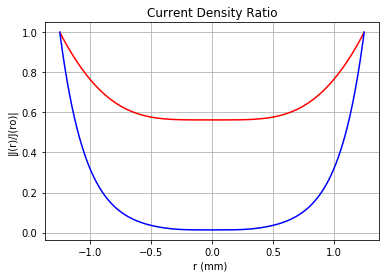

In [50]:
mu0=4*np.pi*10**-7;
Rho=1.68*10**(-8)*(1+0.00404*(0-20))
fsw=10*10**3;
w=2*np.pi*fsw
ro=1.25*10**(-3)
print ( 'fw=',fsw*10**(-3),'kHz', 'red')
print ( 'fw=',10*fsw*10**(-3),'kHz', 'blue')
print ( 'ro=',ro*10**3,'mm')
r=np.linspace(-ro,ro,1000)
m=np.sqrt(w*mu0/Rho)
m1=np.sqrt(w*10*mu0/Rho)
Ratio_rs10=np.sqrt( ss.ber(r*m)**2 + ss.bei(r*m)**2 )/np.sqrt(ss.ber(ro*m)**2+ss.bei(ro*m)**2)
Ratio_rs100=np.sqrt( ss.ber(r*m1)**2 + ss.bei(r*m1)**2 )/np.sqrt(ss.ber(ro*m1)**2+ss.bei(ro*m1)**2)
mpld3.enable_notebook()
plt.grid()
plt.plot(r*1000,Ratio_rs10,'r',r*1000,Ratio_rs100,'b')
plt.xlabel('r (mm) ')
plt.ylabel('|J(r)/J(ro)|' )
plt.title('Current Density Ratio')


Note that from and Ampere's Law one has

$\oint_{c({r_o})} {\bf{H}}  \cdot d{\bf{l}} = i$

in this case results


${H_\phi } = \frac{i}{{2\pi {r_o}}}$

and

${{\bar H}_\phi } = \frac{{\bar I}}{{2\pi {r_o}}}$


On the other hand  since

$\frac{{{{\bar J}_z}(r)}}{{{{\bar J}_z}({r_o})}} = \frac{{{I_o}(r\sqrt {\sigma {\mu _o}j\omega } )}}{{{I_o}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}}$

and

${{\bar E}_z}(r) = \frac{{{{\bar J}_z}(r)}}{\sigma }$

then

$\frac{{{{\bar E}_z}(r)}}{{{{\bar E}_z}({r_o})}} = \frac{{{I_o}(r\sqrt {\sigma {\mu _o}j\omega } )}}{{{I_o}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}}$

or

${{\bar E}_z}(r) = {{\bar E}_z}({r_o})\frac{{{I_o}(r\sqrt {\sigma {\mu _o}j\omega } )}}{{{I_o}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}}$.

From the above derivation  it is possible to say

$\frac{{\partial {{\bar E}_z}}}{{\partial r}} = {\mu _o}j\omega {{\bar H}_\phi }$

$\frac{{\partial {{\bar E}_z}}}{{\partial r}} = {{\bar E}_z}({r_o})\frac{{\frac{{\partial {I_o}(r\sqrt {\sigma {\mu _o}j\omega } )}}{{\partial r}}}}{{{I_o}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}}$

The derivative of the modified Bessel function of first kind,of order zero, with respect its argument is [8]:

$\frac{{dI_0(ax)}}{{dx}} = a{I_1}(x)$,

therefore

$\frac{{\partial {{\bar E}_z}}}{{\partial r}} = {{\bar E}_z}({r_o})\frac{{\sqrt {\sigma {\mu _o}j\omega } {I_1}(r\sqrt {\sigma {\mu _o}j\omega } )}}{{{I_o}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}} = {\mu _o}j\omega {{\bar H}_\phi } = {\mu _o}j\omega \frac{{\bar I}}{{2\pi {r_o}}}$


According to [3] the internal impedance of the conductor per unity of length is defined as:

$\frac{{{{\bar E}_z}({r_o})}}{{\bar I}} = \frac{{{\mu _o}j\omega }}{{2\pi {r_o}\sqrt {\sigma {\mu _o}j\omega } }}\frac{{{I_o}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}}{{{I_1}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}} = {R_{dc}}\frac{{{r_o}\sigma {\mu _o}j\omega }}{{2\sqrt {\sigma {\mu _o}j\omega } }}\frac{{{I_o}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}}{{{I_1}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}} = {R_{dc}}\frac{{{r_o}\sqrt {\sigma {\mu _o}j\omega } }}{2}\frac{{{I_o}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}}{{{I_1}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}}$

the ac resistance is de real part of the internal impedance, or

$\frac{{{R_{ac}}}}{{{R_{dc}}}} = {\mathop{\rm Re}\nolimits} (\frac{{{r_o}\sqrt {\sigma {\mu _o}j\omega } }}{2}\frac{{{I_o}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}}{{{I_1}({r_o}\sqrt {\sigma {\mu _o}j\omega } )}})$.

The skin depth is defined as ${\delta _o}$ is usually defined as:

$\delta_o  = \sqrt {\frac{\rho }{{\pi f{\mu _0}}}} $.

$\frac{{{R_{ac}}}}{{{R_{dc}}}} = {\rm{Re}}(\frac{{{r_o}}}{{{\delta _o}}}\frac{{\sqrt j }}{{\sqrt 2 }}\frac{{{I_o}(\sqrt j \sqrt 2 \frac{{{r_o}}}{{{\delta _o}}})}}{{{I_1}(\sqrt j \sqrt 2 \frac{{{r_o}}}{{{\delta _o}}})}})$

Noting that

${I_n}(x) = {i^{ - n}}{J_n}(ix)$

${J_n}(x{e^{\frac{{3\pi i}}{4}}}) = {{\mathop{\rm ber}\nolimits} _n}(x) + i{{\mathop{\rm bei}\nolimits} _n}(x)$





    

In [51]:
print(mp.ber(0,1))
print(ss.ber(1))
print ( 1j*np.sqrt(1j))
print (np.exp(3*np.pi/4*1j))
print( np.real(np.sqrt(1j)*1j))


0.984381781213087
0.984381781213087
(-0.7071067811865475+0.7071067811865476j)
(-0.7071067811865475+0.7071067811865476j)
-0.7071067811865475


${I_n}(x) = {i^{ - n}}{J_n}(ix)$

${J_n}(x{e^{\frac{{3\pi i}}{4}}}) = {{\mathop{\rm ber}\nolimits} _n}(x) + i{{\mathop{\rm bei}\nolimits} _n}(x)$

$\frac{{{R_{ac}}}}{{{R_{dc}}}} = {\rm{Re}}(\frac{{{r_o}}}{{{\delta _o}}}\frac{{\sqrt j }}{{\sqrt 2 }}\frac{{{J_o}(j\sqrt j \sqrt 2 \frac{{{r_o}}}{{{\delta _o}}})}}{{{j^{ - 1}}{J_1}(j\sqrt j \sqrt 2 \frac{{{r_o}}}{{{\delta _o}}})}})$

$\alpha  = \frac{{{r_o}}}{{{\delta _o}}}$


$\frac{{{R_{ac}}}}{{{R_{dc}}}} = {\rm{Re}}(\alpha \frac{{{e^{j\frac{{3\pi }}{4}}}}}{{\sqrt 2 }}\frac{{{J_o}({e^{j\frac{{3\pi }}{4}}}\sqrt 2 \alpha )}}{{{J_1}({e^{j\frac{{3\pi }}{4}}}\sqrt 2 \alpha )}})$


$\frac{{{R_{ac}}}}{{{R_{dc}}}} = {\rm{Re}}(\alpha \frac{{{e^{j\frac{{3\pi }}{4}}}}}{{\sqrt 2 }}\frac{{{{{\mathop{\rm ber}\nolimits} }_0}(\sqrt 2 \alpha ) + i{{{\mathop{\rm bei}\nolimits} }_0}(\sqrt 2 \alpha )}}{{{{{\mathop{\rm ber}\nolimits} }_1}(\sqrt 2 \alpha ) + i{{{\mathop{\rm bei}\nolimits} }_1}(\sqrt 2 \alpha ))}})$

Text(0.5,1,'Skin effect impact on the ac resistance  ')

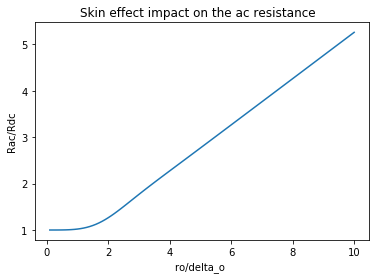

In [52]:
alpha=np.linspace(0.1,10,100) 
b=alpha*np.exp(np.pi*3/4*1j)*np.sqrt(2)
ratioRac_Rdc= np.real(b/2*ss.jn(0,b)/ss.jn(1,b))
plt.plot(alpha,ratioRac_Rdc)
plt.xlabel('ro/delta_o ')
plt.ylabel('Rac/Rdc' )
plt.title('Skin effect impact on the ac resistance  ')


## Skin and Proximity Effects

![Skin Effect](img/Skin_proximity.jpg)

Now let us compute ac resistance considering both the skin and proximity effect according to [9]. $N_l$ is the number of layers, $d$ is the diameter of the conductor, $p$ is the winding pitch, that is, the distance between the center of two adjancent conductors in the same layer, and $n$ is the order of the harmonic considering the fundamental, $n=1$, at the frequency $f_{sw}$.

In [53]:
delta=np.sqrt(Ro/(np.pi*mu0*fsw))
d=2*0.000426
p=d
A=(np.pi/4)**(3/4)*d/delta*np.sqrt(d/p)
n=1
Rac_s=sqrt(n)*A* (np.sinh(2*A*np.sqrt(n))+np.sin(2*A*np.sqrt(n)))/(np.cosh(2*A*np.sqrt(n))-np.cos(2*A*np.sqrt(n)))
NL=3
B=2*(NL**2-1)/3
Rac_p=sqrt(n)*A*B*(np.sinh(2*A*np.sqrt(n))-np.sin(2*A*np.sqrt(n)))/(np.cosh(2*A*np.sqrt(n))+np.cos(2*A*np.sqrt(n)))

print( 'Rac_s/Rdc=',Rac_s)
print( 'Rac_p/Rdc=',Rac_p)
print(r1)

Rac_s/Rdc= 1.0694438676226654
Rac_p/Rdc= 3.7728083268628474
0.000426020274704139


## Flyback Transformer  - Inductor with two  windings

![Skin Effect](img/Flyback Inductor2.jpg)

Initialy let us assume that there no leakage flux, that is, all flux is common to both windings. From the Faradey Law it is possible to obtain the voltage across the two winding inductor

$\begin{gathered}
  {v_1} = {N_1}\frac{{d\varphi }}{{dt}} \hfill \\
  {v_2} = {N_2}\frac{{d\varphi }}{{dt}} \hfill \\ 
\end{gathered} $.

Now, from the Ampere law, 

${N_1}{i_1} + {N_2}{i_2} = \oint {{\mathbf{H}}d{\mathbf{l}}}$

assume that the fmm droop is almost entirely on the gap results:

${N_1}{i_1} + {N_2}{i_2} = H{l_g}$.

In the gap the magnet field and the flux density are related by the air permeability, therefore:

${N_1}{i_1} + {N_2}{i_2} = \frac{{B{l_g}}}{{{\mu _0}}}$

By negleting the fringing flux


${N_1}{i_1} + {N_2}{i_2} = \frac{{\varphi {l_g}}}{{{A_e}{\mu _0}}}$

or

${N_1}{i_1} + {N_2}{i_2} = \varphi {\Re _g}$

where $ {\Re _g}$ is the total air gap reluctance.

Note that:

$\varphi  = \frac{{{N_1}}}{{{\Re _g}}}{i_1} + \frac{{{N_2}}}{{{\Re _g}}}{i_2}$


Now by differentiating $\varphi$ with respect to time an multipling the result by $N_1$ results in the winding voltage

${v_1} = \frac{{N_1^2}}{{{\Re _g}}}\frac{{d{i_1}}}{{dt}} + \frac{{{N_1}{N_2}}}{{{\Re _g}}}\frac{{d{i_2}}}{{dt}}$

Similarly, the voltage across the widing $v_2$ is:

${v_2} = \frac{{{N_1}{N_2}}}{{{\Re _g}}}\frac{{d{i_1}}}{{dt}} + \frac{{N_2^2}}{{{\Re _g}}}\frac{{d{i_2}}}{{dt}}$

In a Matrix form the above equation can be expressed as:

$\left[ {\begin{array}{*{20}{c}}
  {{L_{11}}}&{{M_{12}}} \\ 
  {{M_{12}}}&{{L_{22}}} 
\end{array}} \right]\frac{d}{{dt}}\left[ {\begin{array}{*{20}{c}}
  {{i_1}} \\ 
  {{i_2}} 
\end{array}} \right] = \left[ {\begin{array}{*{20}{c}}
  {{v_1}} \\ 
  {{v_2}} 
\end{array}} \right]$

where ${L_{11}} $ and ${L_{22}} $ are known as self inductances of widings one and  two and are given by:

${L_{11}} = \frac{{N_1^2}}{{{\Re _g}}}$

${L_{22}} = \frac{{N_2^2}}{{{\Re _g}}}$

and 

${M_{12}} = k\frac{{{N_1}{N_2}}}{{{\Re _g}}}$

is the mutual inductance. Note that the coupling coeficient has been introduced to take into account that the leakage flux between the windings. From the above equation we have:

$\frac{{{L_{11}}}}{{{L_{22}}}} = \frac{{N_1^2}}{{N_2^2}}$

$k = \frac{{{M_{12}}}}{{\sqrt {{L_{11}}{L_{22}}} }}$

In a indunctor where the coupling between the widings are strong the $k$ is close to one